# Información previa

## Diseño y esquema codigo

1. Exploracion de los datos
    1. Segmentar los datos por los cluster de clientes
        - **Estudio de los comportamientos de demanda de cada cluster generico:**
        
        Plantear curvas de comportamiento de compra de cada cliente para cada cluster de clientes, de esta forma se visualizara si los clientes poseen estacionalidades similares a lo que respecta a las compras.

        - curvas etacionales de los precios de compra de cada cliente, para cada cluster de clientes
2. Creación de atributos
    1. __Stock__
        - Ajustar hora y valores 
    2. __Abastecimiento:__
        
        - Data demanda general.
        - Cruzar con el stock 
        - tomar en cuenta que los productos se pueden eliminar.
        Para el abastecimiento, se utilizarán 2 dias para definirlo
    
    3. __Demanda__
        - Definir valores.
        - Ajustar por medio del groupby, para que sea de cada cluster.
        - 
        

## Temas a considerar de los datos

### Data Cluster

Los segmentos según lo analisado coinciden en las siguientes caracteristicas

![title](img/Segmento_de_clientes.png)

Los segmentos más llamativos a nivel demanda son **el 4 y el 2**

* **Segmento 2 MAYORISTA**
* **Segmento 4 FRECUENTES**

## Este es un extracto del paper:
 

	
Ventas pasadas con retraso  k, es decir, ventas diarias para el SKU considerado de los últimos k días (tw k : ventana de tiempo de tamaño k ).

	
* Variables binarias para caracterizar días especiales, como:
    * Pago , que caracteriza los días al final de cada mes cuando las personas reciben el pago mensual.
    * Pago intermedio , que caracteriza los días al final de cada quincena en que las personas reciben dos pagos semanales.
    * Antes de las vacaciones , caracterizando los días antes de las vacaciones.
    * Vacaciones , que caracterizan las vacaciones.
    * Independencia , que caracteriza los días de la independencia de Chile (18 y 19 de septiembre).
    * Santa , caracterizando los días de la semana antes del este.
    * Vacaciones , caracterizando los días que pertenecen al período de vacaciones de verano (enero y febrero).
    * Verano , que caracteriza los días de verano (1 de octubre-31 de marzo).	
    * Año nuevo (1 de enero), que caracteriza el único día de cierre de supermercados en Chile.
	
	
* Variables de precio:
    * Precio A  =  precio original del SKU considerado en Economax.
    * Precio B  =  (Precio A) / (Precio máximo en micro-mercado).
    * Precio C  =  (Precio A) / (Precio mínimo en micro-mercado).

		
Observación : Las variables “Precio máximo en micro-mercado” y “Precio mínimo en micro-mercado” son el precio máximo (mínimo) para un determinado SKU en el micro-mercado relevante y son proporcionados por una empresa de investigación de mercado.
		
	

	
 

# Package Install & Open Data


## Import

In [41]:
def Df_ubic(data_X,col,Str):
    df=data_X.copy()
    df=df[df[col]==Str]
    return df

In [42]:
# =============================================================================
# Importar paquetes y abrir Data
# =============================================================================

#gestion DF
import pandas as pd

#Funciones mat y matricicales
import numpy as np

#ploteo simple
import matplotlib.pyplot as plt

# Graficas bonitas
from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

#mode function
import statistics 


##  Data Facturación CT
Esta data contiene las facturaciones(Ventas a los clientes del canal tradicional)

In [43]:
# =============================================================================
# Ajuste de los datos
# =============================================================================

col_names=pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data = pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [44]:
col,Str='Oficina de Ventas Unifica','Temuco'
Data=Df_ubic(Data,col,Str)

### Ajuste facturaciones

In [45]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Kilos Venta KG','Venta Neta CLP','Precio Promedio CLP']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        df[i]=df[i].astype('int64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [46]:
data=Ajuste_data(Data)
data.head(3)
#data=<data[data['Año']>2018]

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
75186,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,15.2021,2021-04-12,LU,43,182668,4290,15,2021
75187,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,16.2021,2021-04-21,MI,43,157268,3690,16,2021
75188,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,17.2021,2021-04-26,LU,20,69393,3390,17,2021


##  Data Clientes
Esta data posee las caracteristicas de los clientes del canal tradicional

In [47]:
Cluster = pd.read_csv("Data/Cluster_clientes.csv",
                          encoding="utf-8",sep=";",dtype={'Cliente - Local.1': 'str'})

### Incluir Columna Cluster(Segmento de cliente)

In [48]:
DF_ventas=pd.merge(Cluster[['Cliente - Local.1','identified_clusters']] , data  
     , how='right')

In [49]:
DF_ventas.tail(3)

,Cliente - Local.1,identified_clusters,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,...,Cliente - Local,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
3870,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,10,42.2020,2020-10-13,MA,40,187863,4750,42,2020
3871,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,50.2019,2019-12-10,MA,37,99308,2692,50,2019
3872,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,49.2020,2020-12-01,MA,20,87176,4450,49,2020


## Data Stock
Esta data posee el nivel de stock de las sucursales de la zona de santiago

In [50]:
SKU='1020003'
fillN='Stock CL '+SKU
col_names=pd.read_csv("Data/last_down/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_stock = pd.read_csv("Data/last_down/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)
Data_stock.head()

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock
0,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,30.12.2019,8,"111,8"
1,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,31.12.2019,7,"111,8"
2,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,02.01.2020,5,"111,8"
3,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,03.01.2020,4,"111,8"
4,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,04.01.2020,3,"111,8"


#### Zona a estudiar


In [51]:
col,Str='Oficina de ventas.1','Temuco'
Data_stock=Df_ubic(Data_stock,col,Str)

### Ajuste Func 

In [52]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Stock']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        #df[i]=df[i].astype('int64')
        df[i]=df[i].astype('float64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    df['Vida Útil Restante']=df['Vida Útil Restante'].astype('int64')
    return df

In [53]:
Data_stock=Ajuste_data(Data_stock)

In [54]:
Data_stock.tail()

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock,Semana,Año
9686,Cerdo,1020003,Sur,T005,Temuco,51.2019,2019-12-17,-138,0.0,51,2019
9687,Cerdo,1020003,Sur,T005,Temuco,51.2019,2019-12-18,-140,0.0,51,2019
9688,Cerdo,1020003,Sur,T005,Temuco,51.2019,2019-12-19,-142,0.0,51,2019
9689,Cerdo,1020003,Sur,T005,Temuco,51.2019,2019-12-20,-144,0.0,51,2019
9690,Cerdo,1020003,Sur,T005,Temuco,51.2019,2019-12-21,-146,0.0,51,2019


## Demanda Z001
Data_totales posee el DF de todas las ventas de Z001

In [55]:
fillN='Vetas Totales CL 1020003'
col_names=pd.read_csv("Data/last_down/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_totales = pd.read_csv("Data/last_down/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [56]:
Data_totales.head(1)

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta,Precio Promedio
0,1020003,Tradicional,Z001,Santiago,Huechuraba,T101,113101019,Espec. en Crudos,Clásico,Alarcon Basabe Horacio Jesus,3200138357,9,39.2019,26.09.2019,JU,41,105.664,2.600


#### Zona a estudiar


In [57]:
col,Str='Oficina de Ventas Unifica','Temuco'
Data_totales=Df_ubic(Data_totales,col,Str)

### Ajuste data 

__Se soluciona el problema__

In [58]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    def delete_asterisco(x):
        x=str(x)
        return x.replace('*','0' )
    
    #proceso iterativo, 
    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
    # se elimina el punto definido para los miles
        if(i!='Kilos Venta KG'):
            df[i]=df[i].str.split('CLP', expand=True)[[0]]
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # se elimina el valor * 
        df[i]=df[i].apply(delete_asterisco)
        
        # Se pasa de ser un str a un int
        print(i)
        df[i]=df[i].astype('int64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [59]:
Data_totales=Ajuste_data(Data_totales)

Kilos Venta KG
Venta Neta
Precio Promedio


# Abastecimiento 
La Data de Demanda representa la demanda del dia anterior, para contrastarlo con el stock

## Demanda Dia Z001
representa la demanda del dia anterior, para contrastarlo con el stock

In [60]:
Data_totales['Tipo de cliente'].unique()

array(['Tradicional', 'Supermercados', 'Industriales', 'Grandes Clientes',
       'Foodservice'], dtype=object)

In [61]:
Demanda_dia_Z001=Data_totales.groupby('Día natural').sum().reset_index()[['Día natural', 'Kilos Venta KG']]
Demanda_dia_Z001.head()

,Día natural,Kilos Venta KG
0,2017-01-03,53
1,2017-01-04,276
2,2017-01-05,195
3,2017-01-06,357
4,2017-01-07,138


## Stock  Dia Z001

In [62]:
Data_stock.tail(2)

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock,Semana,Año
9689,Cerdo,1020003,Sur,T005,Temuco,51.2019,2019-12-20,-144,0.0,51,2019
9690,Cerdo,1020003,Sur,T005,Temuco,51.2019,2019-12-21,-146,0.0,51,2019


Primera parte del calculo de la Vida Útil Restante Promedio

In [63]:
Data_stock['Vida Útil Restante Promedio']=Data_stock['Vida Útil Restante']*Data_stock['Stock']

### Stock total 

In [64]:
Data_stock_Z001=Data_stock.groupby('Día natural').sum().reset_index()[['Día natural', 'Stock','Vida Útil Restante Promedio']]


### Ajuste de fecha 

In [65]:
Data_stock_Z001['Día natural']=Data_stock_Z001['Día natural']+datetime.timedelta(days=1)
Data_stock_Z001['Día natural']

0      2019-11-28
1      2019-11-29
2      2019-11-30
3      2019-12-01
4      2019-12-03
          ...    
398    2021-05-14
399    2021-05-16
400    2021-05-18
401    2021-05-22
402    2021-05-23
Name: Día natural, Length: 403, dtype: object

In [66]:
#weekday_name[datetime.date(2021, 5, 10).weekday()]
Data_stock_Z001['Día natural']=Data_stock_Z001['Día natural'].apply(lambda x: 
                                                                    x+datetime.timedelta(days=1) 
                                                                    if(x.weekday() >= 6) else x)

### Vida util restante

In [67]:
Data_stock_Z001['Vida Útil Restante Promedio']=Data_stock_Z001['Vida Útil Restante Promedio']/Data_stock_Z001['Stock']
Data_stock_Z001.head()

,Día natural,Stock,Vida Útil Restante Promedio
0,2019-11-28,3214.8,-9.0
1,2019-11-29,143.8,-28.0
2,2019-11-30,1065.1,-49.0
3,2019-12-02,1077.0,-20.0
4,2019-12-03,692.0,-39.0


## Merge de Stock Demanda 

In [68]:
DF_VS=pd.merge(Demanda_dia_Z001[['Día natural', 'Kilos Venta KG']] , Data_stock_Z001[['Día natural','Vida Útil Restante Promedio', 'Stock']]  
     , how='right')
DF_VS.sort_values(by=['Día natural'], inplace=True)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,-9.0,3214.8
1,2019-11-29,1843.0,-28.0,143.8
2,2019-11-30,323.0,-49.0,1065.1
3,2019-12-02,233.0,-20.0,1077.0
4,2019-12-03,254.0,-39.0,692.0


In [69]:
DF_VS['Kilos Venta KG']=DF_VS['Kilos Venta KG'].fillna(0)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,-9.0,3214.8
1,2019-11-29,1843.0,-28.0,143.8
2,2019-11-30,323.0,-49.0,1065.1
3,2019-12-02,233.0,-20.0,1077.0
4,2019-12-03,254.0,-39.0,692.0


In [70]:
DF_VS['Stock']=DF_VS['Stock'].fillna(0)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,-9.0,3214.8
1,2019-11-29,1843.0,-28.0,143.8
2,2019-11-30,323.0,-49.0,1065.1
3,2019-12-02,233.0,-20.0,1077.0
4,2019-12-03,254.0,-39.0,692.0


### Grafica 

In [71]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

Ploteo sin fondo

```
from plotnine import *
theme_set(theme_void())#sin fondo
theme_set(theme_classic())
theme_set(theme_bw())
theme_set(theme_gray())#basico
GRafico

grafico.save('Prueba.png',dpi=1000)

dpi es la densidad de los pixeles
```

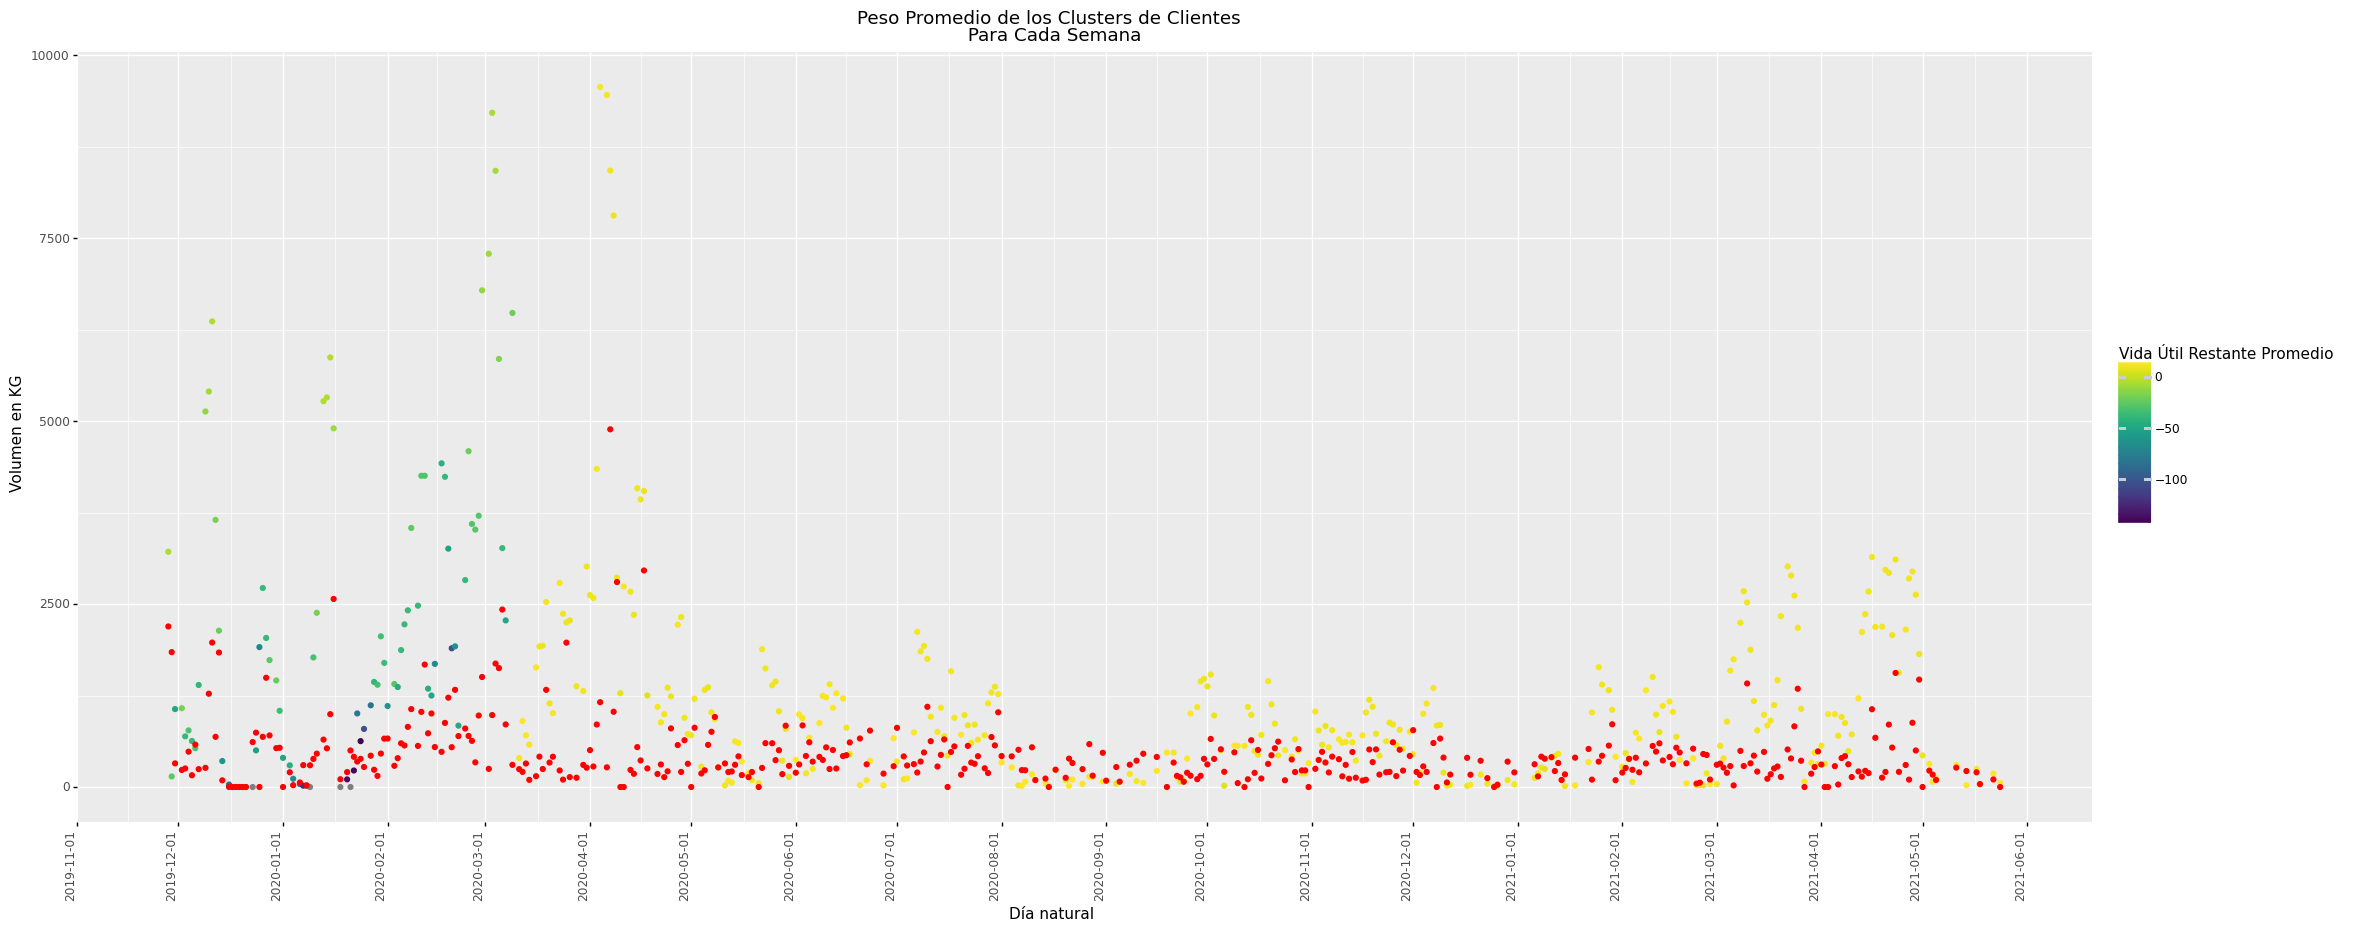

<ggplot: (122064242981)>

In [72]:
GRaph_Disp_cluster=(
    ggplot(DF_VS, aes(x='Día natural',
                               y= 'Stock'))\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ))\
                 + geom_point(aes(x='Día natural',
                               y= 'Kilos Venta KG'),color='red')\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

## Caclualo Abastecimiento

\begin{equation}
Abastecimiento_n = Stock_{n+1}+Demanda_n-Stock_n  
\end{equation}



\begin{equation}
Stock_{n+1}=Abastecimiento_n +Stock_n -Demanda_n  
\end{equation}

In [73]:
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,-9.0,3214.8
1,2019-11-29,1843.0,-28.0,143.8
2,2019-11-30,323.0,-49.0,1065.1
3,2019-12-02,233.0,-20.0,1077.0
4,2019-12-03,254.0,-39.0,692.0


In [74]:
Lista_temp=DF_VS.Stock.to_list()[1:]
Lista_temp.append(0)
Lista_temp[:4]

[143.8, 1065.1, 1077.0, 692.0]

In [75]:
DF_VS['Stock+1']=Lista_temp
DF_VS.tail()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock,Stock+1
398,2021-05-14,218.0,10.0,24.7,247.2
399,2021-05-17,201.0,10.0,247.2,41.1
400,2021-05-18,40.0,8.0,41.1,184.0
401,2021-05-22,103.0,10.0,184.0,55.2
402,2021-05-24,0.0,9.0,55.2,0.0


In [76]:
DF_VS['Abastecimiento']=DF_VS['Stock+1']+DF_VS['Kilos Venta KG']-DF_VS['Stock']
DF_VS.tail()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento
398,2021-05-14,218.0,10.0,24.7,247.2,440.5
399,2021-05-17,201.0,10.0,247.2,41.1,-5.1
400,2021-05-18,40.0,8.0,41.1,184.0,182.9
401,2021-05-22,103.0,10.0,184.0,55.2,-25.8
402,2021-05-24,0.0,9.0,55.2,0.0,-55.2


### Restando un dia 

```python
def caculo_Aba(Abastecimiento,Stock,Volumen):
    x['Abastecimiento']=x['Stock']-x['Volumen en KG']
    return x

def Abastecimiento_df(data):
    df=data.copy()
    df_futuro=data.copy()
    df_futuro['Día natural']=df_futuro['Día natural']-datetime.timedelta(days=1)
    df_futuro=df_futuro.rename(columns={'Stock':'Stock+1'})
    df=pd.merge(df_futuro[['Día natural','Stock+1']] , df
     , how='right')
    
    a=df.iloc[0:4]
    
    #a.apply(caculo_Aba,)
    return(a)
Abastecimiento_df(DF_VS)
``` 

```python
def caculo_Aba(Stock,Volumen):
    Abastecimiento=Stock+Volumen
    return Abastecimiento

def Abastecimiento_df(data):
    df=data.copy()
    a=df.iloc[0:4]
    
    a['Abastecimiento']=a.apply( lambda x: caculo_Aba(
        x['Stock'],x['Kilos Venta KG']),
           axis = 1)
    return(a)
Abastecimiento_df(DF_VS)

```

## Comportamiento abastecimiento 

### Graficos de Abastecimiento 

In [77]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [78]:
DF_VS['Kilos Venta KG'].isnull().sum()

0

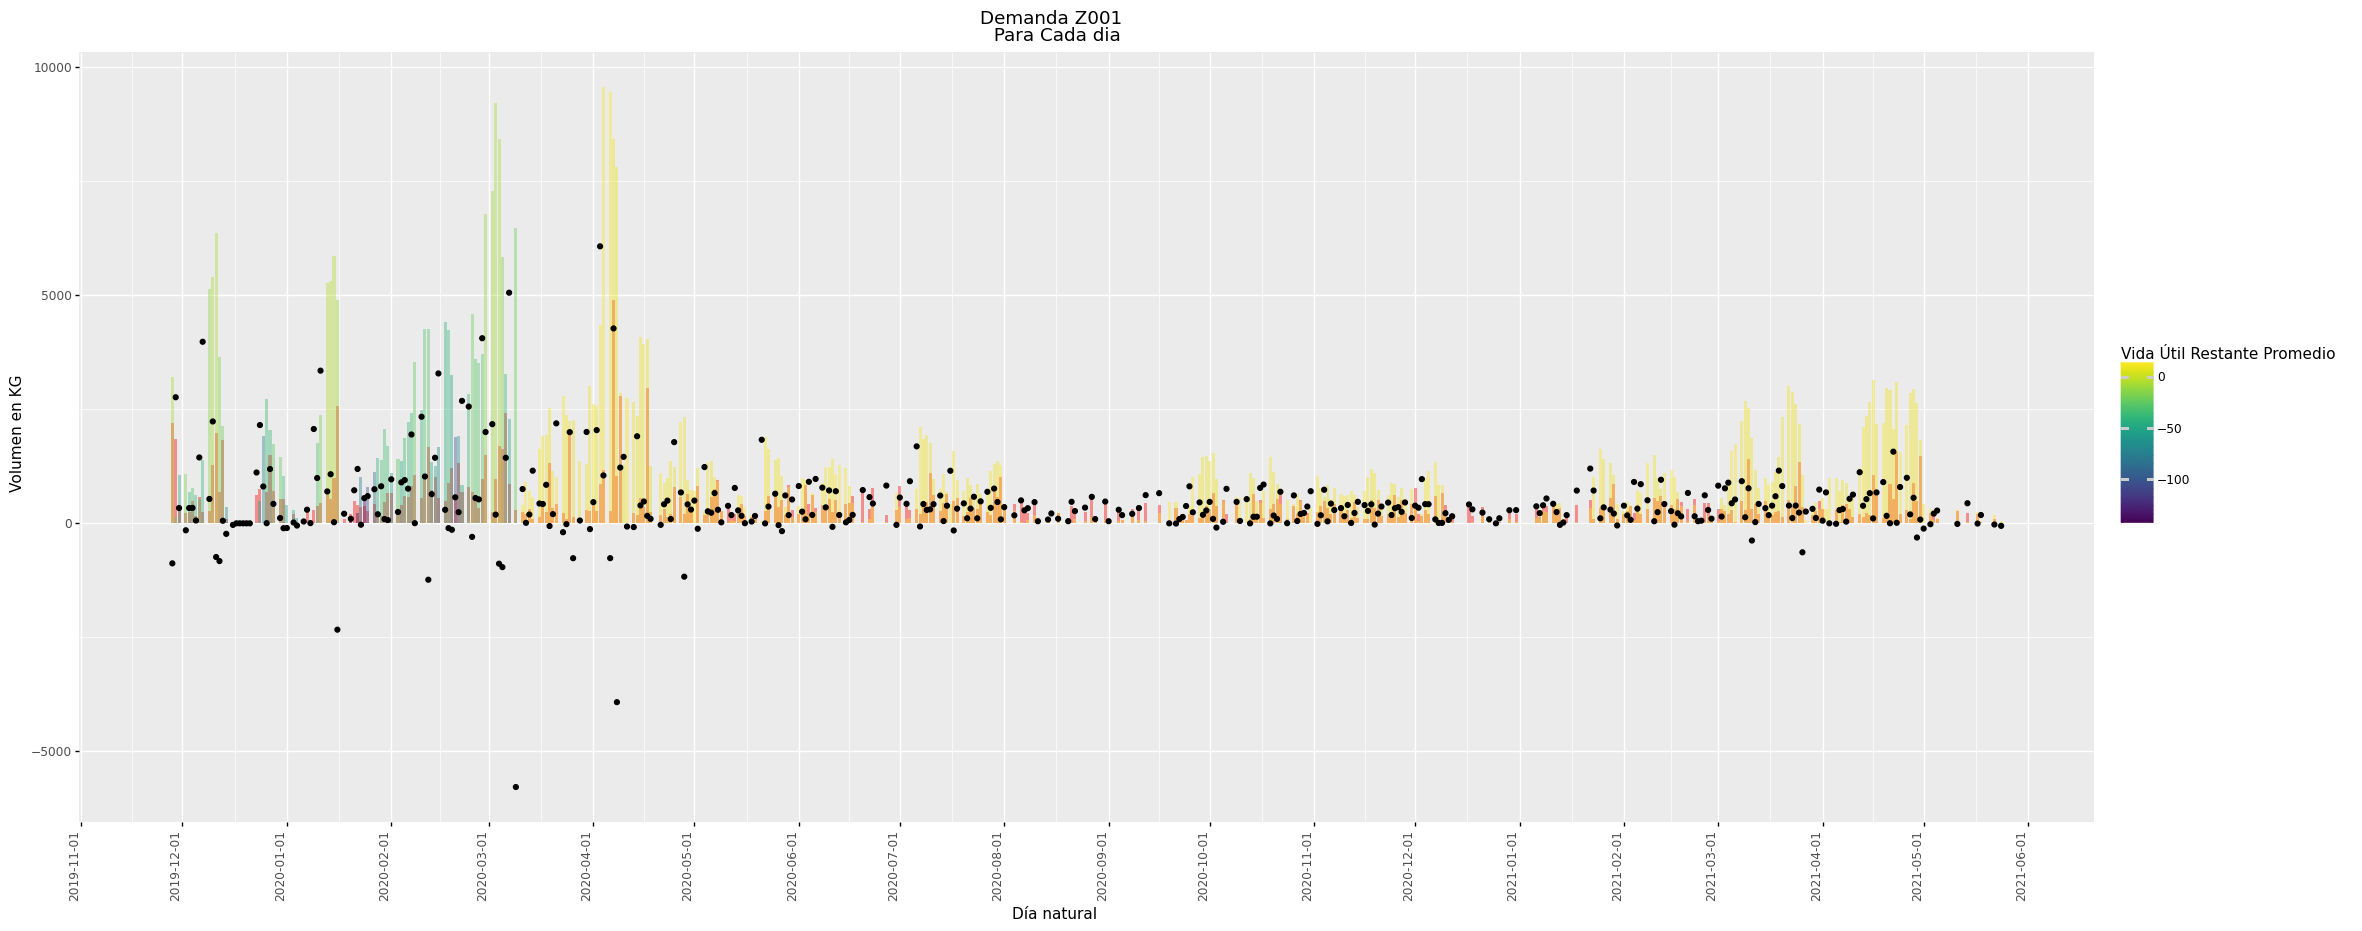

<ggplot: (122067400876)>

In [79]:
Abastec=(
    ggplot(DF_VS, aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=0.4)\
                + geom_col(aes(x='Día natural',y= 'Stock',fill='Vida Útil Restante Promedio'
                     ),alpha=0.4)\
                + geom_point(aes(x='Día natural',y= 'Abastecimiento'),color='black')\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Abastec

<ipython-input-80-3689d590f42d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


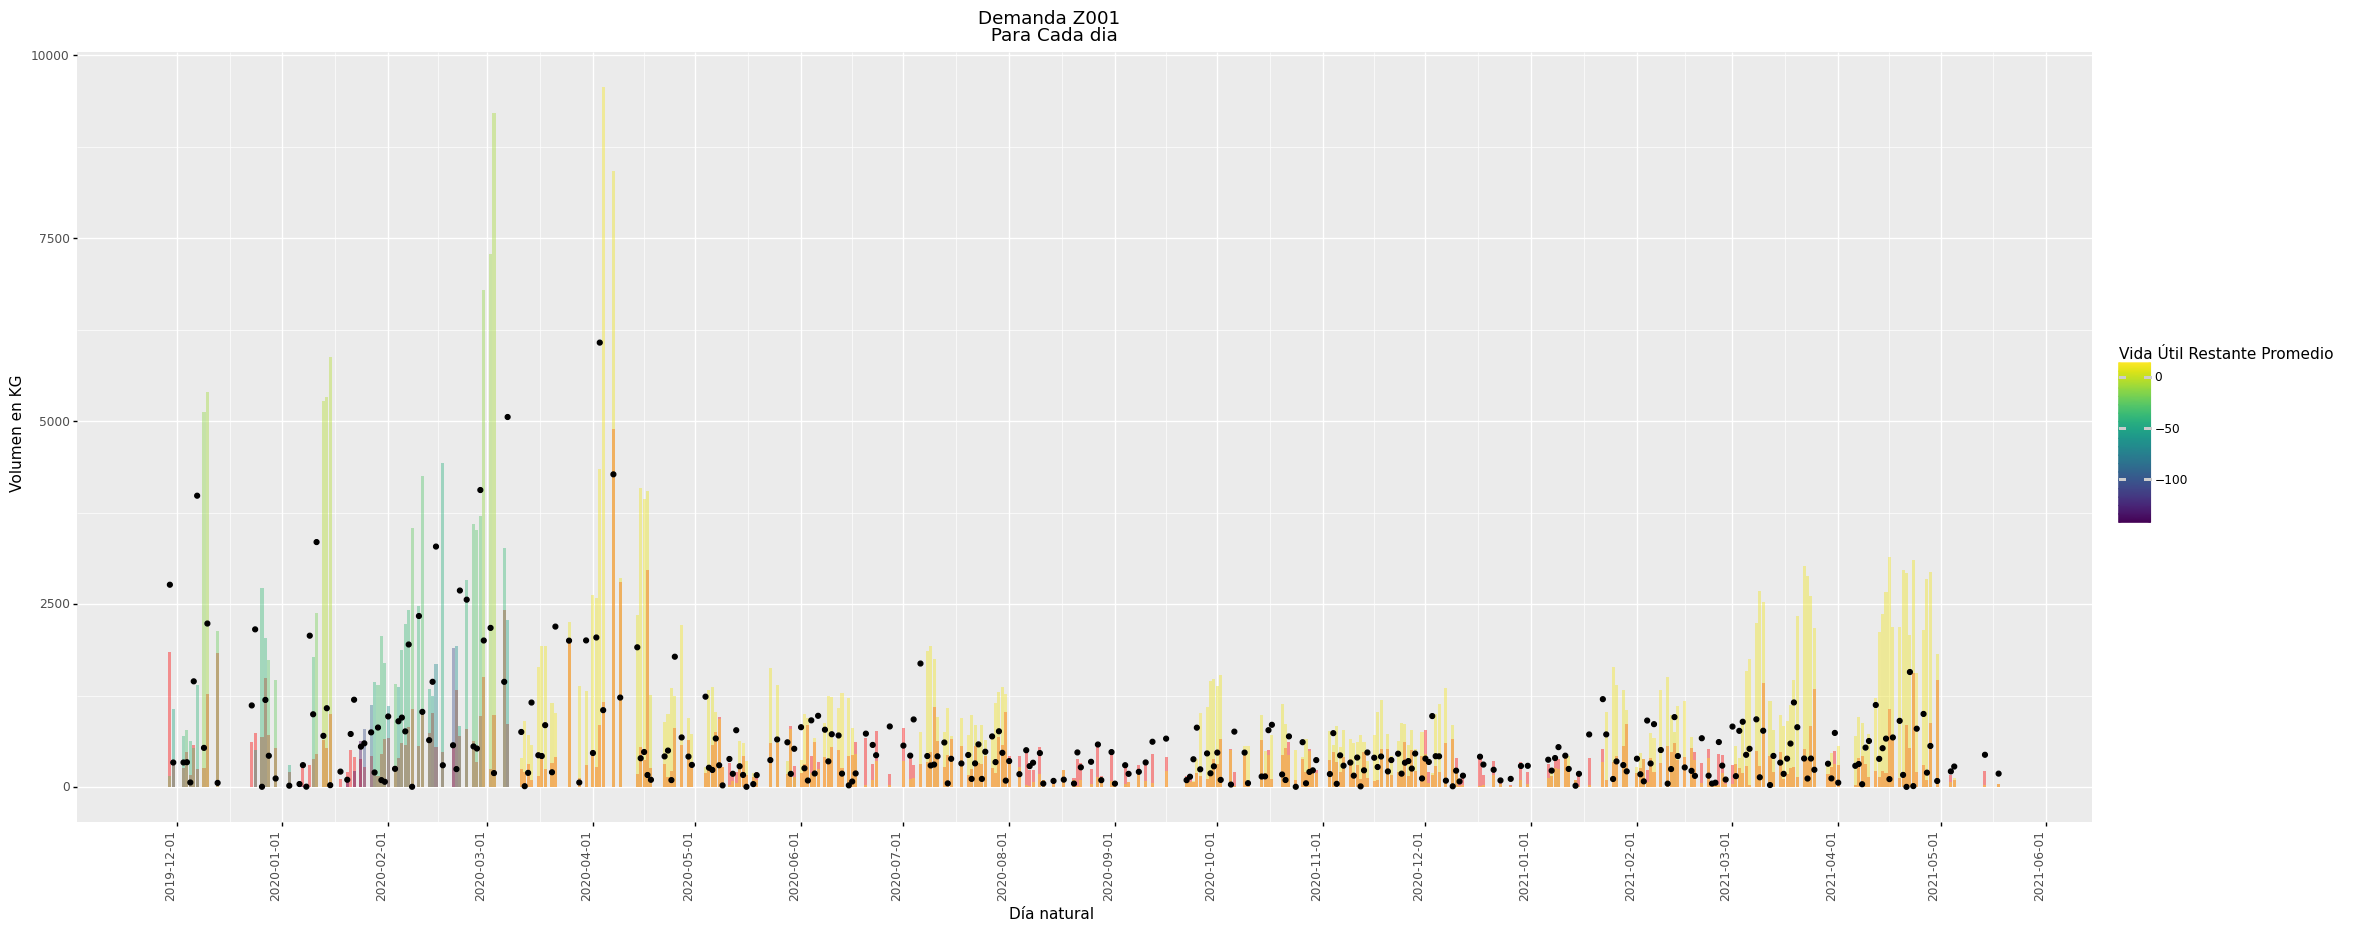

<ggplot: (122064344143)>

In [80]:
Abastec=(
    ggplot(DF_VS[DF_VS.Abastecimiento>=0 ][DF_VS['Kilos Venta KG']>0], aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=0.4)\
                + geom_col(aes(x='Día natural',y= 'Stock',fill='Vida Útil Restante Promedio'
                     ),alpha=0.4)\
                + geom_point(aes(x='Día natural',y= 'Abastecimiento'),color='black')\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Abastec

### Precio promedio
Kilos Venta KG= sum(Kilos Venta KG)

Venta Neta CLP	= la suma de los ingresos

\begin{equation}
Precio_{ponderado} [{\dfrac{CLP}{KG}}]= \dfrac{Ingresos_{totales}[CLP]}{Volumen de ventas[KG]}
\end{equation}

In [81]:
Data_totales.head()

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta,Precio Promedio,Semana,Año
75186,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,15.2021,2021-04-12,LU,43,182668,4290,15,2021
75187,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,16.2021,2021-04-21,MI,43,157268,3690,16,2021
75188,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,17.2021,2021-04-26,LU,20,69393,3390,17,2021
75189,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,5,18.2021,2021-05-05,MI,26,94489,3590,18,2021
75190,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,5,19.2021,2021-05-10,LU,37,141412,3849,19,2021


In [82]:
def P_podn(data):
    df=data.groupby('Día natural').sum().reset_index()#[['Día natural', 'Kilos Venta KG']]
    df['Precio Ponderado']=df['Venta Neta']/df['Kilos Venta KG']
    #df['Día natural']=df['Día natural']-datetime.timedelta(days=1)
    return df[['Día natural','Kilos Venta KG','Precio Ponderado']]
P_podn(Data_totales).tail()

,Día natural,Kilos Venta KG,Precio Ponderado
1276,2021-05-17,201,5325.671642
1277,2021-05-18,40,5324.275000
1278,2021-05-19,397,5142.544081
1279,2021-05-20,264,4747.507576
1280,2021-05-22,103,5497.330097


In [83]:
 P_podn(Data_totales).head()

,Día natural,Kilos Venta KG,Precio Ponderado
0,2017-01-03,53,3087.396226
1,2017-01-04,276,3349.873188
2,2017-01-05,195,3259.928205
3,2017-01-06,357,3599.044818
4,2017-01-07,138,3382.811594


In [84]:
#=====================================
# Merge
#=====================================
DF_VS2=pd.merge( P_podn(Data_totales)  ,DF_VS
     , how='left')#'right')
DF_VS2.head()

,Día natural,Kilos Venta KG,Precio Ponderado,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento
0,2017-01-03,53,3087.396226,NaN,NaN,NaN,NaN
1,2017-01-04,276,3349.873188,NaN,NaN,NaN,NaN
2,2017-01-05,195,3259.928205,NaN,NaN,NaN,NaN
3,2017-01-06,357,3599.044818,NaN,NaN,NaN,NaN
4,2017-01-07,138,3382.811594,NaN,NaN,NaN,NaN


In [85]:
DF_VS2['Precio Ponderado'].mean()

3304.5548369555163

<ipython-input-86-f45e95aede1d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


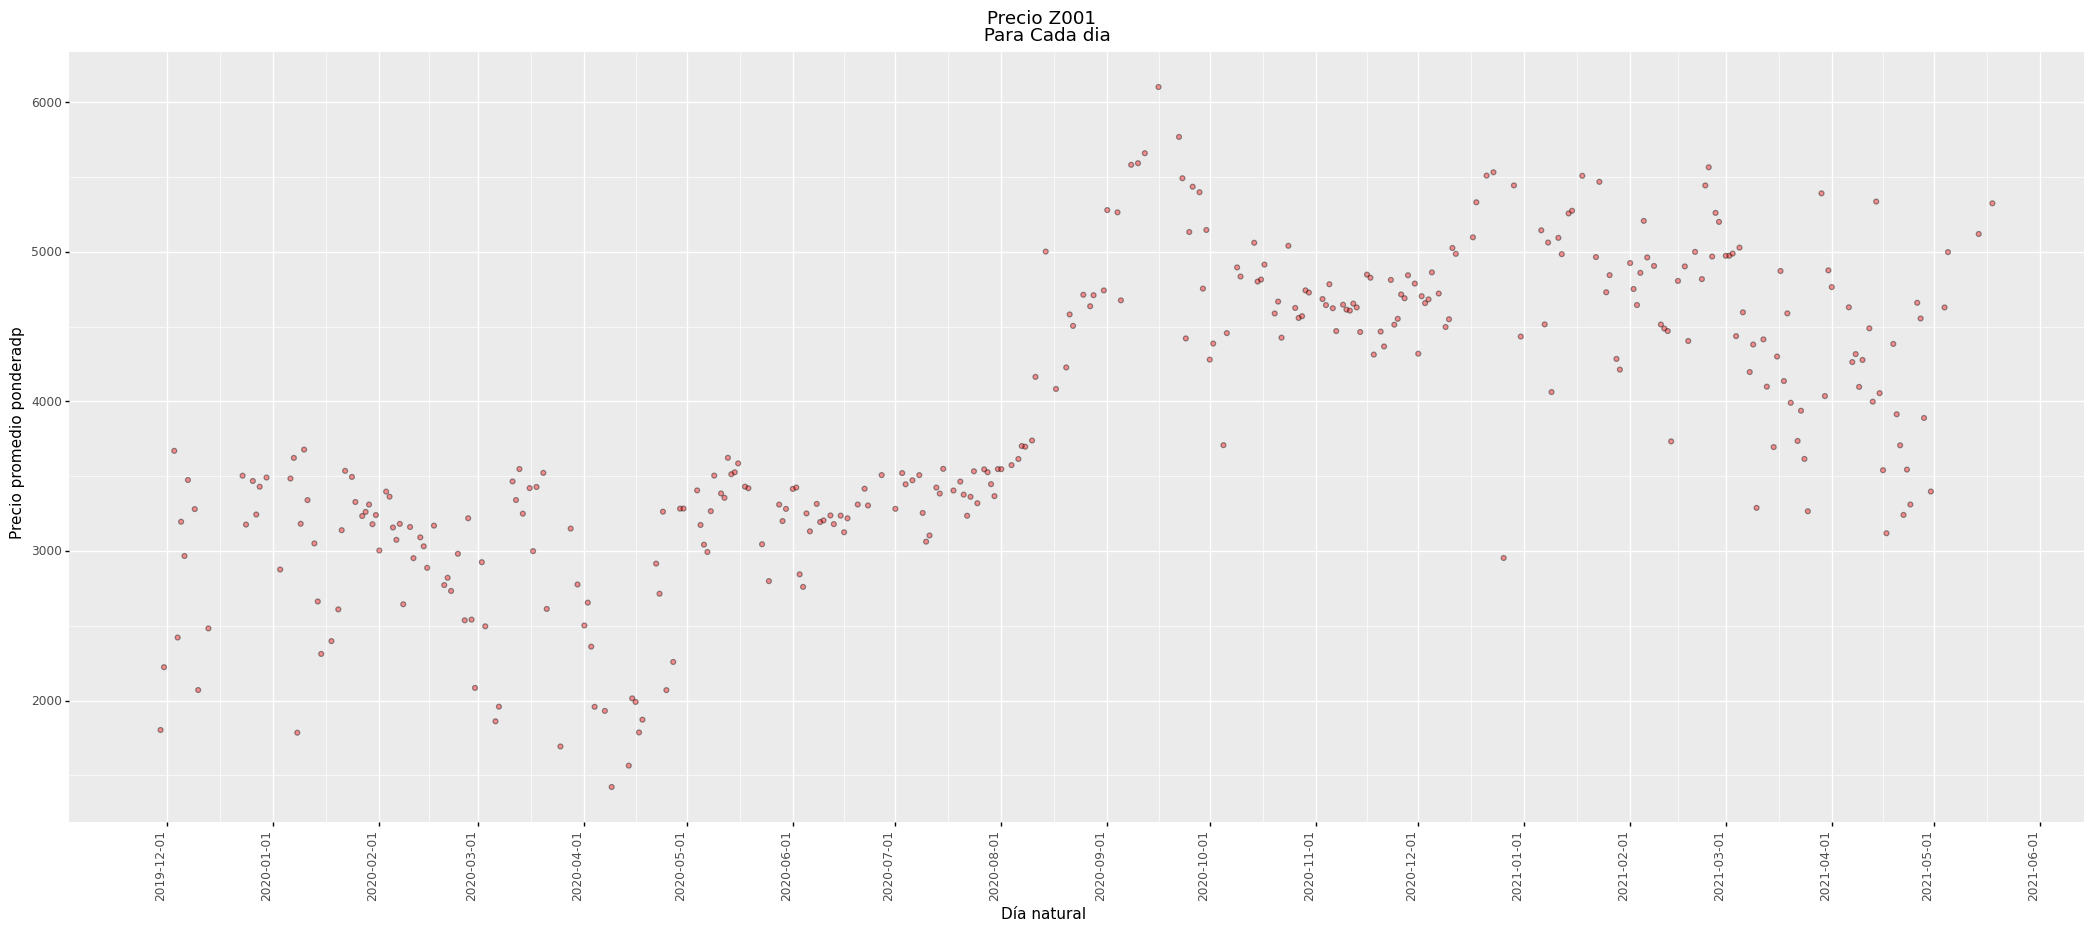

<ggplot: (122067402978)>

In [86]:
Abastec=(
    ggplot(DF_VS2[DF_VS2.Abastecimiento>=0 ][DF_VS2['Kilos Venta KG']>0],
           aes(x='Día natural',y='Precio Ponderado'))                 
                + geom_point(fill='red',alpha=0.4)\
                + labs(y='Precio promedio ponderadp',x='Día natural',size=14)\
                +ggtitle(('Precio Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Abastec

# Demanda o distribución inventario a Sup o CT 

In [87]:
Data_totales.head()

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta,Precio Promedio,Semana,Año
75186,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,15.2021,2021-04-12,LU,43,182668,4290,15,2021
75187,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,16.2021,2021-04-21,MI,43,157268,3690,16,2021
75188,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,17.2021,2021-04-26,LU,20,69393,3390,17,2021
75189,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,5,18.2021,2021-05-05,MI,26,94489,3590,18,2021
75190,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,5,19.2021,2021-05-10,LU,37,141412,3849,19,2021


## Demanda semanal por canal

In [88]:
Demanda_Semana_Z001_canales=Data_totales.groupby(['Año','Semana','Tipo de cliente'
                                         ]).sum().reset_index()[[
    'Año','Semana', 'Tipo de cliente', 'Kilos Venta KG']]
Demanda_Semana_Z001_canales.head()

,Año,Semana,Tipo de cliente,Kilos Venta KG
0,2017,1,Foodservice,35
1,2017,1,Industriales,67
2,2017,1,Supermercados,734
3,2017,1,Tradicional,183
4,2017,2,Foodservice,31


In [89]:
 Demanda_Semana_Z001_canales=Demanda_Semana_Z001_canales.rename(
     columns={'Kilos Venta KG':'Demanda Canal KG'})

## Demanda General de la zona por Semana 

In [90]:
Demanda_Semana_Z001=Data_totales.groupby(['Año','Semana'
                                         ]).sum().reset_index()[[
    'Año','Semana', 'Kilos Venta KG']]
Demanda_Semana_Z001.head()

,Año,Semana,Kilos Venta KG
0,2017,1,1019
1,2017,2,911
2,2017,3,1985
3,2017,4,936
4,2017,5,1458


## Merge de los dos DF 

In [91]:
DF_Dem=pd.merge(Demanda_Semana_Z001_canales[
    Demanda_Semana_Z001_canales['Tipo de cliente']=='Supermercados'] 
                , Demanda_Semana_Z001, how='right')
#DF_Dem.sort_values(by=['Día natural'], inplace=True)
DF_Dem.head()

,Año,Semana,Tipo de cliente,Demanda Canal KG,Kilos Venta KG
0,2017,1,Supermercados,734,1019
1,2017,2,Supermercados,588,911
2,2017,3,Supermercados,1335,1985
3,2017,4,Supermercados,757,936
4,2017,5,Supermercados,1046,1458


In [92]:
DF_Dem['% del volumen a Supermercados']=\
DF_Dem['Demanda Canal KG']/DF_Dem['Kilos Venta KG']*100#/.reset_index()
DF_Dem.head()

,Año,Semana,Tipo de cliente,Demanda Canal KG,Kilos Venta KG,% del volumen a Supermercados
0,2017,1,Supermercados,734,1019,72.031403
1,2017,2,Supermercados,588,911,64.544457
2,2017,3,Supermercados,1335,1985,67.254408
3,2017,4,Supermercados,757,936,80.876068
4,2017,5,Supermercados,1046,1458,71.742112


## merge con tradicional 

In [93]:
DF_Dem2=pd.merge(Demanda_Semana_Z001_canales[
    Demanda_Semana_Z001_canales['Tipo de cliente']=='Tradicional'] 
                , DF_Dem.drop(['Tipo de cliente','Demanda Canal KG'],axis=1), how='right')
#DF_Dem.sort_values(by=['Día natural'], inplace=True)
DF_Dem2.head()

,Año,Semana,Tipo de cliente,Demanda Canal KG,Kilos Venta KG,% del volumen a Supermercados
0,2017,1,Tradicional,183.0,1019,72.031403
1,2017,2,Tradicional,241.0,911,64.544457
2,2017,3,Tradicional,407.0,1985,67.254408
3,2017,4,Tradicional,90.0,936,80.876068
4,2017,5,Tradicional,312.0,1458,71.742112


In [94]:
DF_Dem2['% del volumen a Tradicional']=\
DF_Dem2['Demanda Canal KG']/DF_Dem2['Kilos Venta KG']*100#/.reset_index()
DF_Dem2=DF_Dem2.drop(['Tipo de cliente','Demanda Canal KG'],axis=1)
DF_Dem2.head()

,Año,Semana,Kilos Venta KG,% del volumen a Supermercados,% del volumen a Tradicional
0,2017,1,1019,72.031403,17.958783
1,2017,2,911,64.544457,26.454446
2,2017,3,1985,67.254408,20.503778
3,2017,4,936,80.876068,9.615385
4,2017,5,1458,71.742112,21.399177


In [95]:
DF_Dem2.dtypes

Año                                int64
Semana                             int64
Kilos Venta KG                     int64
% del volumen a Supermercados    float64
% del volumen a Tradicional      float64
dtype: object

In [96]:
DF_Dem2.to_csv('proporc_Volumen.csv', index=False)

#  Formación Data Predicciones

Artificial Neural Network + Prophet Model of Facebook


\begin{equation}
Demanda=
Prophet+E_p
\end{equation}

\begin{equation}
E_p=ANN + E_ANN
\end{equation}


* Falta incorporar el precio como variable
    * Precio del CT
    * Precio de Z001
    * Precio dia anterior
    * Precio o semana anterior

```python

#DF_ventas Posee las ventas de los clientes del CT
DF_ventas 

#DF_VS Posee los niveles de Stok Abastecimiento y Demanda de la Z001
DF_VS

# Dias_Festivos Posee los dias festivos del 2019 al 2020
Dias_Festivos
```

Se juntaran los 3 df para formar 1, para ello se generará en primer lugar un df con

```python
DF_ventas[DF_ventas['identified_clusters']==4].groupby('Día natural').sum().reset_index()[['Día natural','Kilos Venta KG']]
``` 


De tal forma que se tiene la demanda dia del segmento, Despues se realiza un Merge con cada uno de los otros DF, de tal forma que la demanda dia posee más partes X que le agregan robustes al modelo.


## Cluster 4, Segmento Frecuente 

### DF create 

In [ ]:
DF_ventas.head(1)

In [ ]:
DF_Frecuent=DF_ventas[
    DF_ventas['identified_clusters']==4
                     ].groupby('Día natural').sum().reset_index()[[
    'Día natural','Kilos Venta KG',
       'Venta Neta CLP', 'Precio Promedio CLP'
]]#[['Día natural','Kilos Venta KG']]
DF_Frecuent['Precio Promedio CLP']=DF_Frecuent['Venta Neta CLP']/DF_Frecuent['Kilos Venta KG']
DF_Frecuent.head()

### Exploracion de los datos 

#### Grafico de comportamiento del precio 

In [ ]:
Prec=(
    ggplot(DF_Frecuent, aes(x='Día natural',y='Precio Promedio CLP'))                 
                + geom_point(color='red',alpha=0.4)\
                #+ labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Prec

In [ ]:
#DF_VS
Dem=(
    ggplot(DF_Frecuent, aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=1)\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Dem

In [ ]:
DF_Frecuent[DF_Frecuent['Día natural']>=
datetime.date(2019, 1, 1)].head()

In [ ]:
DF_Frecuent['Año']=DF_Frecuent['Día natural'].apply( lambda x: x.year)
DF_Frecuent['Año'].head()

In [ ]:
DF_Frecuent["Día natural"].head()

In [ ]:
#DF_VS

Dem=[
    ggplot(DF_Frecuent[DF_Frecuent['Año']==i], aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=1)\
                +facet_grid('Año~.')\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month')) for i in [2019,2020,2021]
]
Dem

In [ ]:
DF_Frecuent.head(1)

In [ ]:
#DF_VS

Dem=[
    ggplot(DF_Frecuent[DF_Frecuent['Año']==i], aes(x='Día natural',y='Precio Promedio CLP'))                 
                + geom_col(fill='red',alpha=1)\
                +facet_grid('Año~.')\
                #+ labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Precio Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month')) for i in [2019,2020,2021]
]
Dem

#### unificar años en 1 

In [ ]:
def fecha(x):
    s=str(x.month)+'-'+str(x.day)
    return(s)
"""
DF_Frecuent['Día mes']=DF_Frecuent['Día natural'].apply( lambda x:fecha (x))
df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
"""                                                                           

### Sección Prophet 

#### Data

In [ ]:
fillN='Valores_prophet'
col_names=pd.read_csv(""+fillN+".csv",
                    encoding="utf-8",sep=",",nrows=0).columns
types_dict = {col: str for col in col_names}

DF_Predict = pd.read_csv(""+fillN+".csv",
                   encoding="utf-8",sep=",",dtype=types_dict)

DF_Predict = DF_Predict.rename(columns={'ds':"Día natural"})
DF_Predict["Día natural"] = DF_Predict["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%Y-%m-%d').date())
DF_Predict.head(1)
DF_Predict.head()

### Union con Festivos

In [ ]:
DF_Fest2=pd.merge(DF_Fest,DF_Predict
                 , how='right')

#DF_Fest2.sort_values(by=['Día natural'], inplace=True)
print(DF_Fest2.shape)
DF_Fest2.head()#[DF_Fest.Año==2019].head(20)

In [ ]:
DF_Fest2.dtypes

In [ ]:
DF_Fest2.Error=DF_Fest2.Error.astype('float64')
DF_Fest2.Error.hist()

### Guardar CSV 

In [ ]:
#DF_Fest2.to_csv('prophet_Fest.csv', index=False)